## Brief Projet : 

Vous êtes un data analyst ,vous travaillez en bénévolat pour la médiathèque de la ville qui a mis en place un site web pour la vente de certains livres de son stock.. et elle souhaite analyser les caractéristiques sa clientèle pour mieux comprendre les tendances de leurs reservations/achats de livres. 

La médiathèque vous donne accès à leur site : http://books.toscrape.com/index.html. et souhaite que vous collectez/analysez leurs données.


**Étapes du projet** :

1. **Collecte de données** : 
* Utiliser la bibliothèque `requests` pour envoyer des requêtes HTTP au site web qui répertorie les livres. Vous récupérez le contenu HTML de la page web.

* A l'aide de la bibliothèque `Beautiful Soup`, analyser le contenu HTML du site et extraire les informations pertinentes: parcourir le code HTML, identifier les balises cibles (qui contiennent les données sur les livres, telles que `<div>` ou `<li>` ) et extraire les informations pertinentes telles que le nom du livre, la catégorie, la note moyenne des avis, le nombre de livres en stock, le prix etc.

2. **Nettoyage et préparation des données** : nettoyer les valeurs, convertir les types de données si nécessaire, gérer les valeurs manquantes, etc.

3. **Stockage des données** : 
* Proposer une modélisation de base de données SQL adaptée. 
* Créer le schéma de la base de données , les différentes tables pour stocker les données propres sur les livres.

4. **Analyse des données** : 

* Faire une analyse exploratoire des données : identification de KPIs pertinents ,création de graphiques, le calcul de statistiques descriptives, l'identification de tendances, etc => pour aider la médiathèque à mieux faire son étude de clientèle. 



### Importer les librairies

In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Analyse exploratoire et Visualisation des données

* faire une analyse exploratoire des données pour mieux comprendre la distribution des valeurs dans chaque colonne, identifier des tendances ou des valeurs aberrantes potentielles..

#### Analyse univariée, Visualiser les données

* Distribution de la variable 'price' =>  Création d'un histogramme pour le prix

In [5]:
df1=pd.read_csv('../books.csv')
display(df1.head())
print(df1.shape)

,title,rating,price,availability,category
0,A Light in the Attic,Three,51.77,In stock,Books
1,Tipping the Velvet,One,53.74,In stock,Books
2,Soumission,One,50.10,In stock,Books
3,Sharp Objects,Four,47.82,In stock,Books
4,Sapiens: A Brief History of Humankind,Five,54.23,In stock,Books


(1723, 5)


In [9]:
# Vérifier les doublons dans le DataFrame
print(df1.shape)
print(df1.drop_duplicates().shape)
df1=df1.drop_duplicates()

(1723, 5)
(1723, 5)


In [10]:

display(df1.head())
print(df1.shape)

,title,rating,price,availability,category
0,A Light in the Attic,Three,51.77,In stock,Books
1,Tipping the Velvet,One,53.74,In stock,Books
2,Soumission,One,50.10,In stock,Books
3,Sharp Objects,Four,47.82,In stock,Books
4,Sapiens: A Brief History of Humankind,Five,54.23,In stock,Books


(1723, 5)


In [14]:
# Count how many books are "In stock"
in_stock_count = df1[df1['availability'] == 'In stock']['title'].count()
print(in_stock_count)

1723


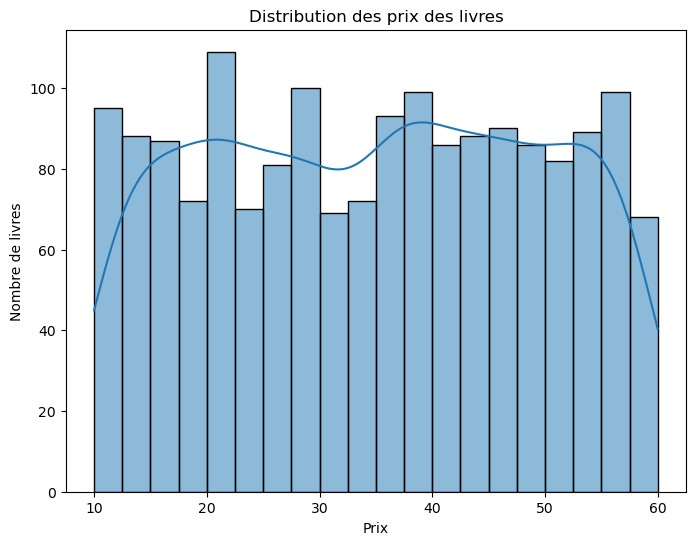

In [15]:
# Distribution de la variable 'price'
plt.figure(figsize=(8, 6))
sns.histplot(df1['price'], bins=20, kde=True)
plt.xlabel('Prix')
plt.ylabel('Nombre de livres')
plt.title('Distribution des prix des livres')
plt.show()

* Distribution de la variable 'availability' 

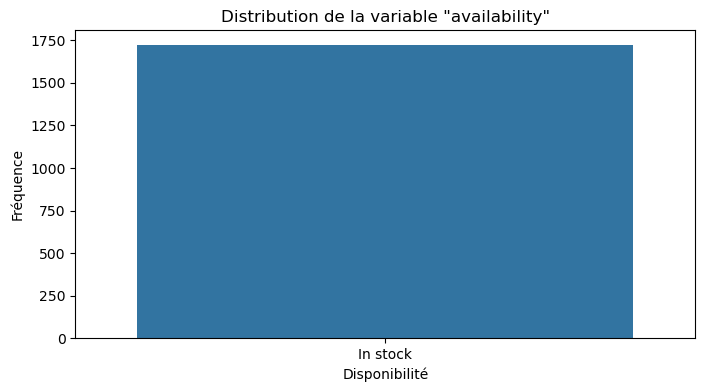

In [16]:
#Distribution de la variable 'availability' 
plt.figure(figsize=(8, 4))
sns.countplot(data=df1, x='availability')
plt.title('Distribution de la variable "availability"')
plt.xlabel('Disponibilité')
plt.ylabel('Fréquence')
plt.show()


* Distribution de la variable 'rating'

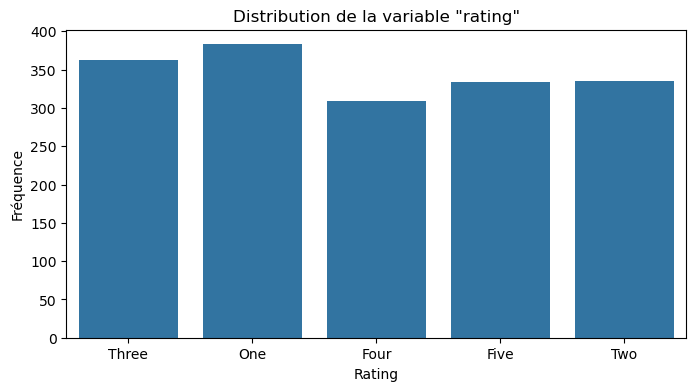

In [17]:
# Distribution de la variable 'rating'
plt.figure(figsize=(8, 4))
sns.countplot(data=df1, x='rating')
plt.title('Distribution de la variable "rating"')
plt.xlabel('Rating')
plt.ylabel('Fréquence')
plt.show()

In [18]:
df1['rating'].value_counts()

rating
One      383
Three    362
Two      335
Five     334
Four     309
Name: count, dtype: int64

In [19]:
df1['rating'].value_counts().sort_index()

rating
Five     334
Four     309
One      383
Three    362
Two      335
Name: count, dtype: int64

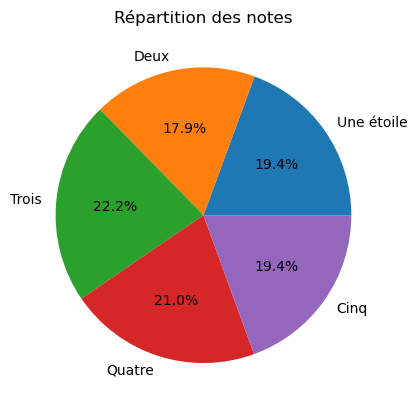

In [20]:
#représenter la répartition des notes en Pie Chart
notes = df1['rating'].value_counts().sort_index()
labels = ['Une étoile', 'Deux', 'Trois', 'Quatre', 'Cinq']
plt.pie(notes, labels=labels, autopct='%1.1f%%')
plt.title("Répartition des notes")
plt.show()

#### Analyser les categories de livres 

* comparer la catégorie 'Books' avec les reste des categories ..


In [21]:
books_category_books = df1[df1['category'] == 'Books']
books_category_books.shape

(1000, 5)

In [22]:
books_category = df1[df1['category'] != 'Books']
books_category.shape

(723, 5)

In [23]:
print(df1['title'].nunique())

999


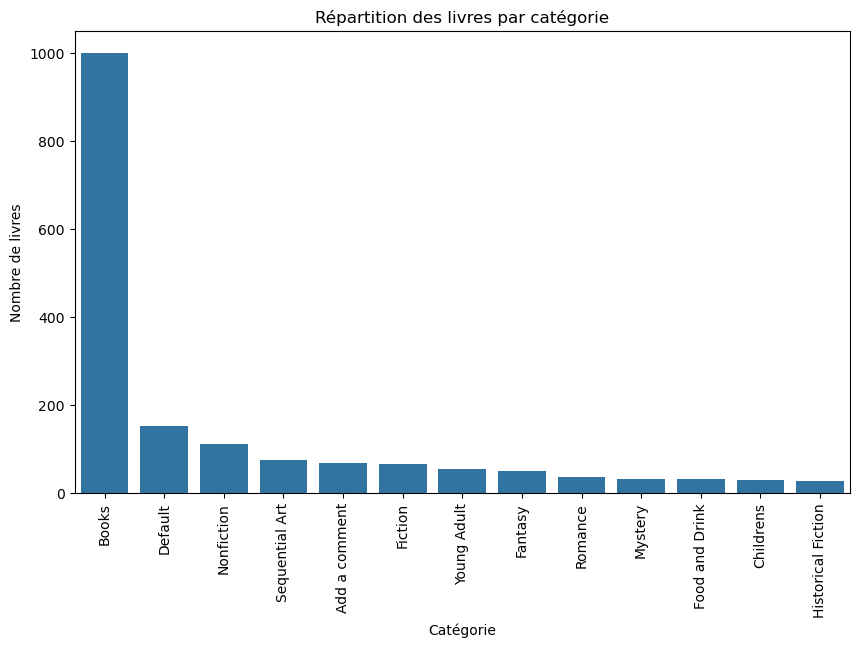

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df1, order=df1['category'].value_counts().index)
plt.xlabel('Catégorie')
plt.ylabel('Nombre de livres')
plt.title('Répartition des livres par catégorie')
plt.xticks(rotation=90)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.show()

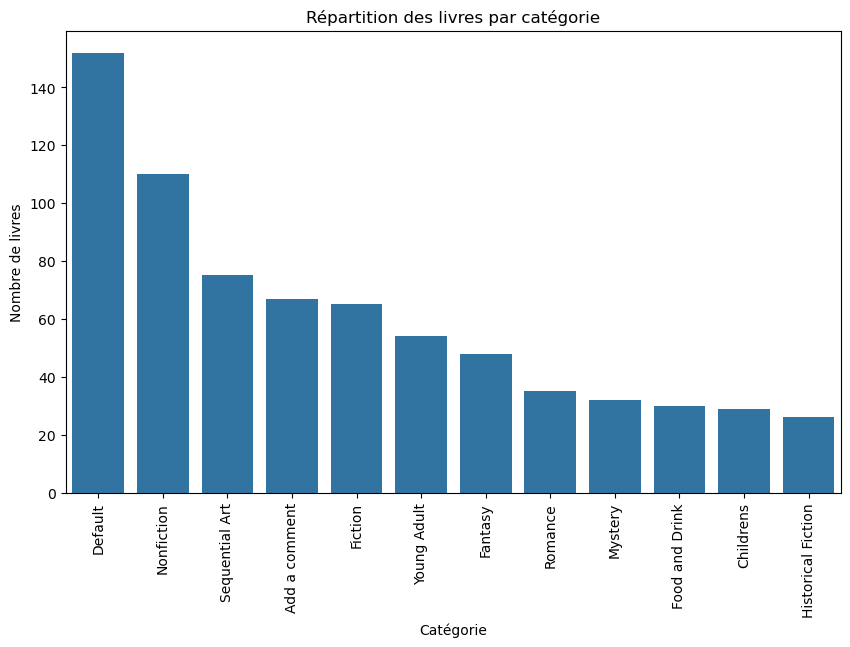

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df1[df1['category'] != 'Books'], order=df1[df1['category'] != 'Books']['category'].value_counts().index)
plt.xlabel('Catégorie')
plt.ylabel('Nombre de livres')
plt.title('Répartition des livres par catégorie')
plt.xticks(rotation=90) 
plt.show()

#### Identifier les valeurs aberrantes (outliers)

* Création d'un boxplot pour le prix par catégorie


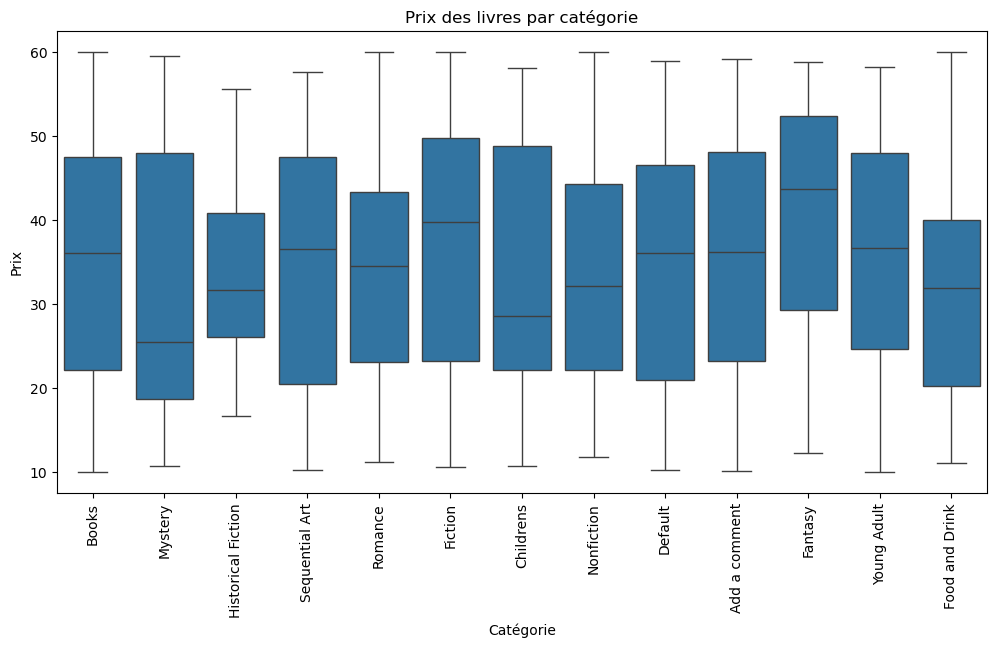

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='price', data=df1)
plt.xlabel('Catégorie')
plt.ylabel('Prix')
plt.title('Prix des livres par catégorie')
plt.xticks(rotation=90)
plt.show()

In [31]:
# Count how many books are "In stock"
df1_instock = df1[df1['availability'] == 'In stock'].count()
df1_instock

title           1723
rating          1723
price           1723
availability    1723
category        1723
dtype: int64

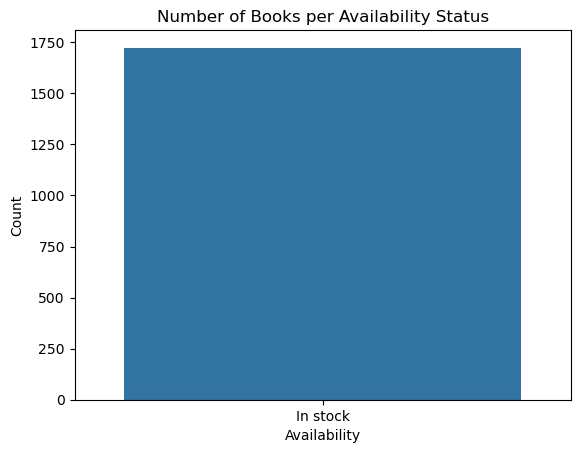

In [27]:
# Nbre de livres par status de disponibilité (in stock, out of stock)
# Assuming 'df1' is my DataFrame with the 'availability' column
sns.countplot(data=df1, x='availability')

# Customize the plot
plt.title('Number of Books per Availability Status')
plt.xlabel('Availability')
plt.ylabel('Count')

# Show the plot
plt.show()

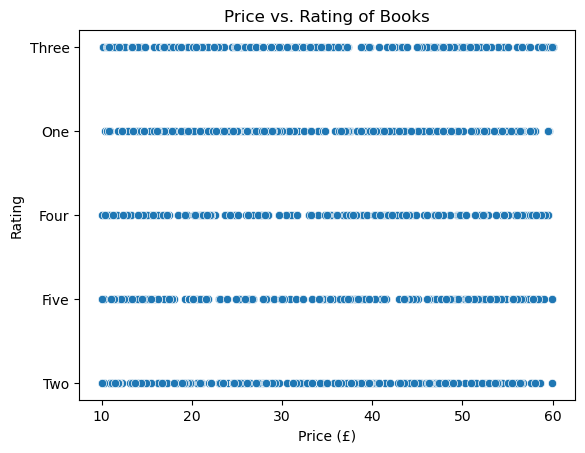

In [33]:
# Cluster price and rating
# Assuming 'df1' is my DataFrame with 'price' and 'rating' columns
sns.scatterplot(data=df1, x='price', y='rating')

# Customize the plot
plt.title('Price vs. Rating of Books')
plt.xlabel('Price (£)')
plt.ylabel('Rating')

# Show the plot
plt.show()

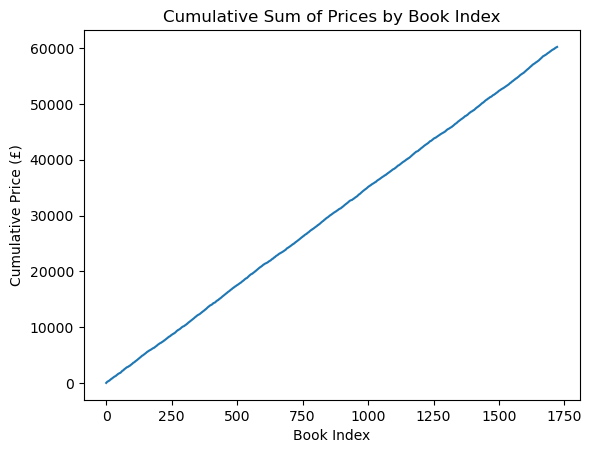

In [34]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df1' is my DataFrame with 'price' column and a sequential index
df1['cumulative_price'] = df1['price'].cumsum()
sns.lineplot(data=df1, x=df1.index, y='cumulative_price')

# Customize the plot
plt.title('Cumulative Sum of Prices by Book Index')
plt.xlabel('Book Index')
plt.ylabel('Cumulative Price (£)')

# Show the plot
plt.show()

## Next:
- Proposer d'autres axes d'analyse

## Bonus
-continuer le scraping du site en récupérant plus d'informations sur les livres..